# Introduction to Deep Learning in Python using TensorFlow and Keras

In this section, we are going to explore the tensorflow package by creating a neural network to determine hand written numbers. We will be using the MNIST data set. This is example is like the "hello world" of deep learning. This activity should help us get familiar with deep learning and how we can apply it to our current project. This example will be using a convolutional neural network (CNN). For our project for predicting games, we will use a multilayer perceptron.

In [1]:
import tensorflow as tf

# Get 28x28 images of handwritten digits 0-9
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) =  mnist.load_data()

# Normalize our data
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

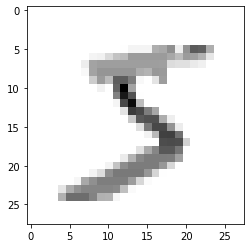

In [2]:
import matplotlib.pyplot as plt

# Show the first image in our training set
plt.imshow(X_train[0], cmap = plt.cm.binary)

plt.show()

In [3]:
# Build the model
model = tf.keras.models.Sequential()

# Add our input layer
model.add(tf.keras.layers.Flatten())

# Add a hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Add output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4669 - accuracy: 0.8661
Epoch 2/3
1875/1875 [==============================] - 2s 992us/step - loss: 0.1121 - accuracy: 0.9653
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0724 - accuracy: 0.9765


In [4]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)
print(f"Validation loss: {validation_loss}")
print(f"Validation accuracy: {validation_accuracy}")

313/313 [==============================] - 0s 746us/step - loss: 0.0818 - accuracy: 0.9756
Validation loss: 0.08178697526454926
Validation accuracy: 0.975600004196167


Consider rewriting this model with the Functional API.
The model's prediction: 7


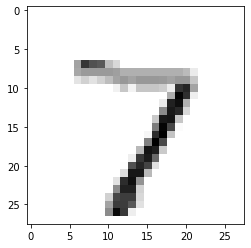

In [5]:
import numpy as np

predictions = model.predict([X_test])
print(f"The model's prediction: {np.argmax(predictions[0])}")

plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()